In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from my_functions import *


df_subject_info = pd.read_csv('Archivos\subject-info.csv')[['Subject', 'Count quality']]

In [2]:
# Se crea un arreglo tridimensional de 36 x 19 x 19
distances_bef: np.ndarray = np.zeros((N, N_CHANNELS, N_CHANNELS), dtype='float32')
distances_dur: np.ndarray = np.zeros((N, N_CHANNELS, N_CHANNELS), dtype='float32')

for i in range(N):
	subject: str = f'Subject{i:02}'
	csv_path_bef: str = f'Archivos/{subject}/csv/{subject}_1.csv'
	csv_path_dur: str = f'Archivos/{subject}/csv/{subject}_2.csv'

	distances_bef[i, :, :] = get_distances(csv_path_bef)
	distances_dur[i, :, :] = get_distances(csv_path_dur)

# Mediana

## Mediana de todos los participantes

In [3]:
med_before: pd.DataFrame = pd.DataFrame(np.median(distances_bef, 0), columns=CHANNELS)
med_during: pd.DataFrame = pd.DataFrame(np.median(distances_dur, 0), columns=CHANNELS)

med_before.index = CHANNELS
med_during.index = CHANNELS

df_centrality_med_bef: pd.DataFrame = get_centrality_from_df(med_before)
df_centrality_med_dur: pd.DataFrame = get_centrality_from_df(med_during)

df_centrality_med_bef['status'] = 'before'
df_centrality_med_dur['status'] = 'during'

df_centrality_med: pd.DataFrame = pd.concat([df_centrality_med_bef, df_centrality_med_dur], ignore_index=True)

display(df_centrality_med_bef.head(), df_centrality_med_dur.head())
display(med_before.head(), med_during.head())

,nodes,degree,betweenness,closeness,pagerank,status
0,Fp1,0.055556,0.000000,0.214286,0.035199,before
1,Fp2,0.055556,0.000000,0.181818,0.036630,before
2,F3,0.166667,0.215686,0.268657,0.083590,before
3,F4,0.111111,0.209150,0.268657,0.051142,before
4,F7,0.055556,0.000000,0.214286,0.034541,before


,nodes,degree,betweenness,closeness,pagerank,status
0,Fp1,0.055556,0.000000,0.219512,0.035242,during
1,Fp2,0.055556,0.000000,0.219512,0.035952,during
2,F3,0.166667,0.215686,0.276923,0.084267,during
3,F4,0.166667,0.215686,0.276923,0.083835,during
4,F7,0.055556,0.000000,0.219512,0.036603,during


,Fp1,Fp2,F3,F4,F7,F8,T3,T4,C3,C4,T5,T6,P3,P4,O1,O2,Fz,Cz,Pz
Fp1,0.000000,1.023270,0.765956,0.862886,0.778930,1.076267,1.051522,1.202561,0.973423,1.058631,1.235258,1.373894,1.226988,1.292050,1.377595,1.391284,0.817068,0.994514,1.236857
Fp2,1.023270,0.000000,0.891647,0.812945,1.103950,0.799711,1.189247,1.085837,1.074964,1.025123,1.335461,1.256756,1.287781,1.272243,1.405717,1.378411,0.811687,1.024624,1.266098
F3,0.765956,0.891647,0.000000,0.610975,0.747499,0.950501,0.832577,1.022057,0.700828,0.803121,1.096244,1.279645,1.034771,1.101212,1.286542,1.297947,0.479774,0.663736,1.071189
F4,0.862886,0.812945,0.610975,0.000000,0.970794,0.768487,1.036167,0.855195,0.794701,0.690078,1.238276,1.155893,1.108349,1.052547,1.311670,1.263884,0.456861,0.680212,1.093666
F7,0.778930,1.103950,0.747499,0.970794,0.000000,1.105191,0.937608,1.243879,0.984049,1.104715,1.129057,1.388325,1.212599,1.290467,1.341098,1.366412,0.890238,1.031256,1.230267


,Fp1,Fp2,F3,F4,F7,F8,T3,T4,C3,C4,T5,T6,P3,P4,O1,O2,Fz,Cz,Pz
Fp1,0.000000,1.062354,0.830999,0.969468,0.897345,1.131129,1.073759,1.219996,1.041611,1.124822,1.226020,1.344098,1.212149,1.259141,1.342896,1.358148,0.900759,1.057446,1.237557
Fp2,1.062354,0.000000,0.906794,0.844260,1.085949,0.905701,1.171204,1.093132,1.107689,1.050112,1.297524,1.273178,1.252866,1.224856,1.366920,1.348794,0.877781,1.028386,1.243221
F3,0.830999,0.906794,0.000000,0.635363,0.872351,1.002349,0.852666,1.046703,0.661404,0.755996,1.051247,1.188600,0.970298,1.052169,1.186551,1.234951,0.473251,0.668140,1.016367
F4,0.969468,0.844260,0.635363,0.000000,0.994220,0.824205,0.980919,0.904680,0.791978,0.660467,1.172722,1.085641,1.038878,1.036777,1.254640,1.234189,0.475800,0.674311,1.028438
F7,0.897345,1.085949,0.872351,0.994220,0.000000,1.200443,1.008179,1.213719,0.985714,1.110245,1.131449,1.333013,1.149480,1.242471,1.324543,1.340533,0.964721,1.032259,1.210482


In [4]:
# Colocar las medidas de centralidad como atributos de los nodos

mst_med_before: nx.Graph = get_mst_from_df(med_before)
mst_med_during: nx.Graph = get_mst_from_df(med_during)

for i, node in enumerate(CHANNELS):
	mst_med_before.nodes[node]['degree'] = round(df_centrality_med_bef['degree'][i], 2)
	mst_med_before.nodes[node]['betweenness'] = round(df_centrality_med_bef['betweenness'][i], 2)
	mst_med_before.nodes[node]['closeness'] = round(df_centrality_med_bef['closeness'][i], 2)
	mst_med_before.nodes[node]['pagerank'] = round(df_centrality_med_bef['pagerank'][i], 2)

	mst_med_during.nodes[node]['degree'] = round(df_centrality_med_dur['degree'][i], 2)
	mst_med_during.nodes[node]['betweenness'] = round(df_centrality_med_dur['betweenness'][i], 2)
	mst_med_during.nodes[node]['closeness'] = round(df_centrality_med_dur['closeness'][i], 2)
	mst_med_during.nodes[node]['pagerank'] = round(df_centrality_med_dur['pagerank'][i], 2)

### Gráficas

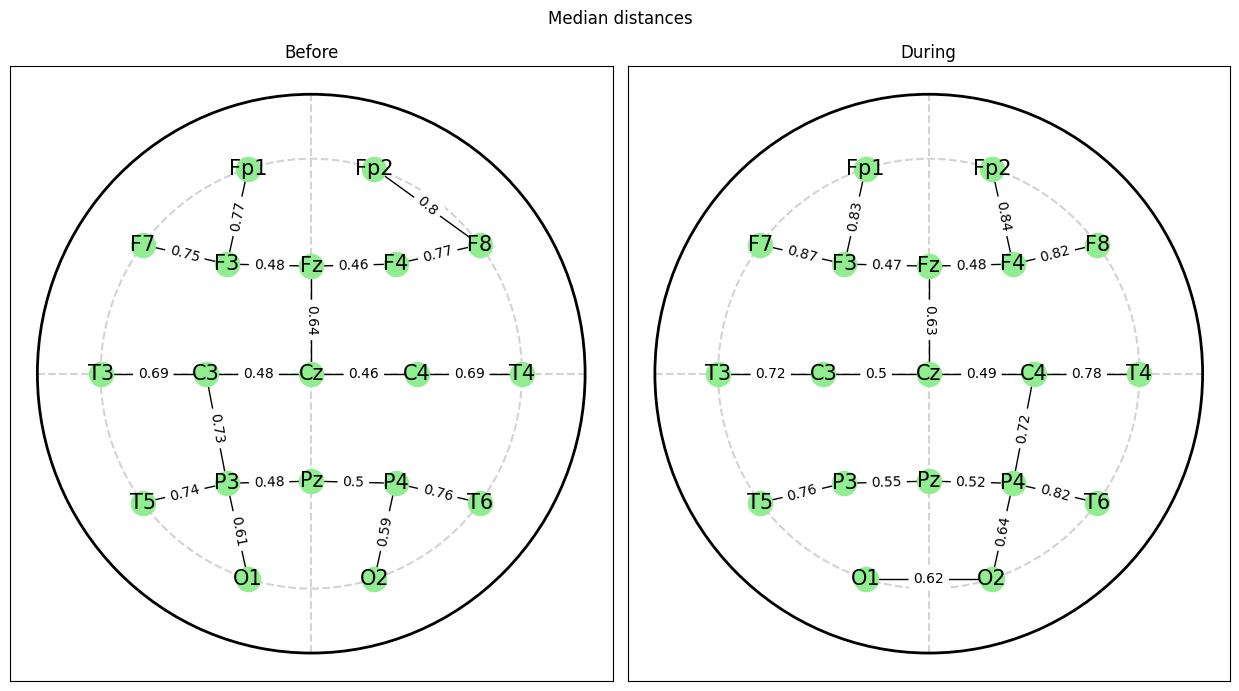

In [5]:
plot_mst_distances(mst_med_before, mst_med_during, 'Median distances')

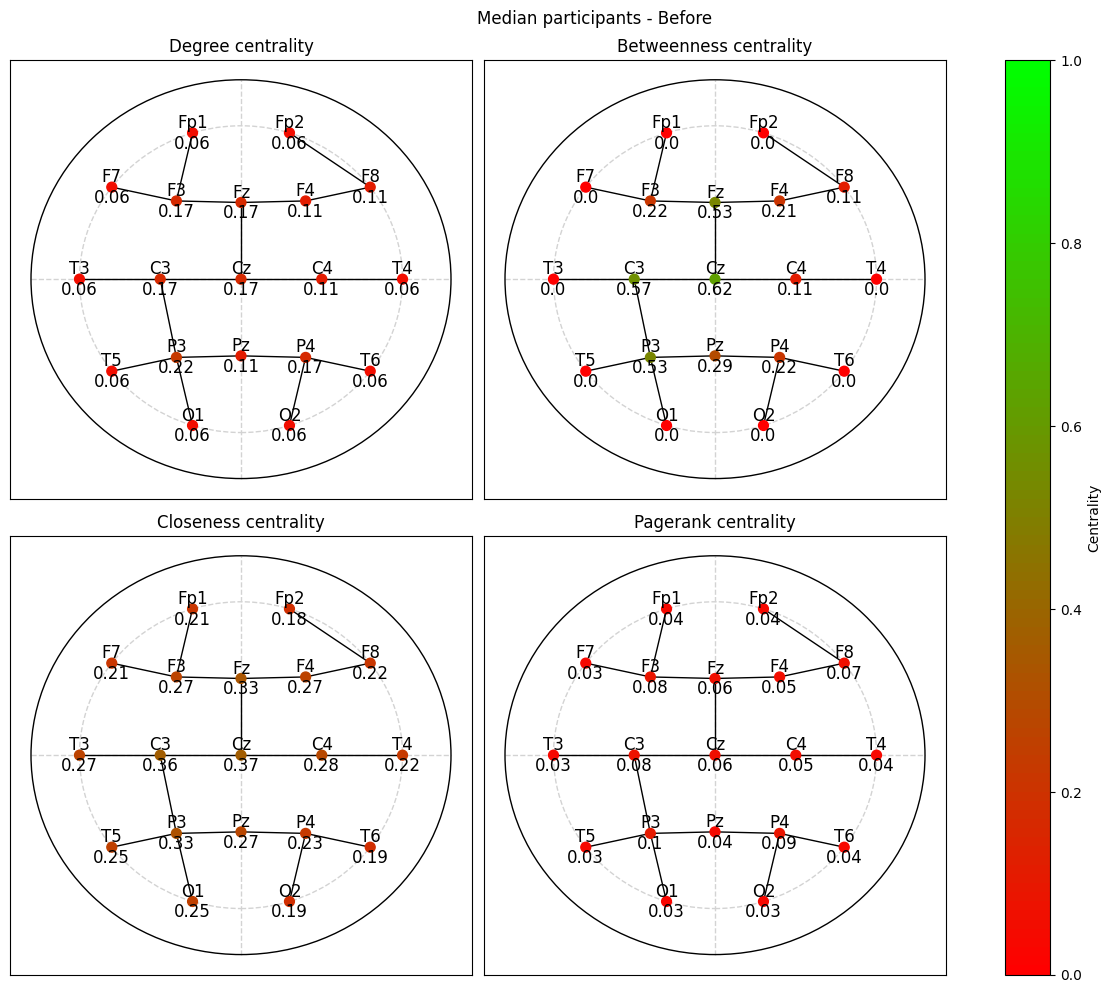

In [6]:
plot_all_measures(mst_med_before, df_centrality_med_bef, 'Median participants - Before')

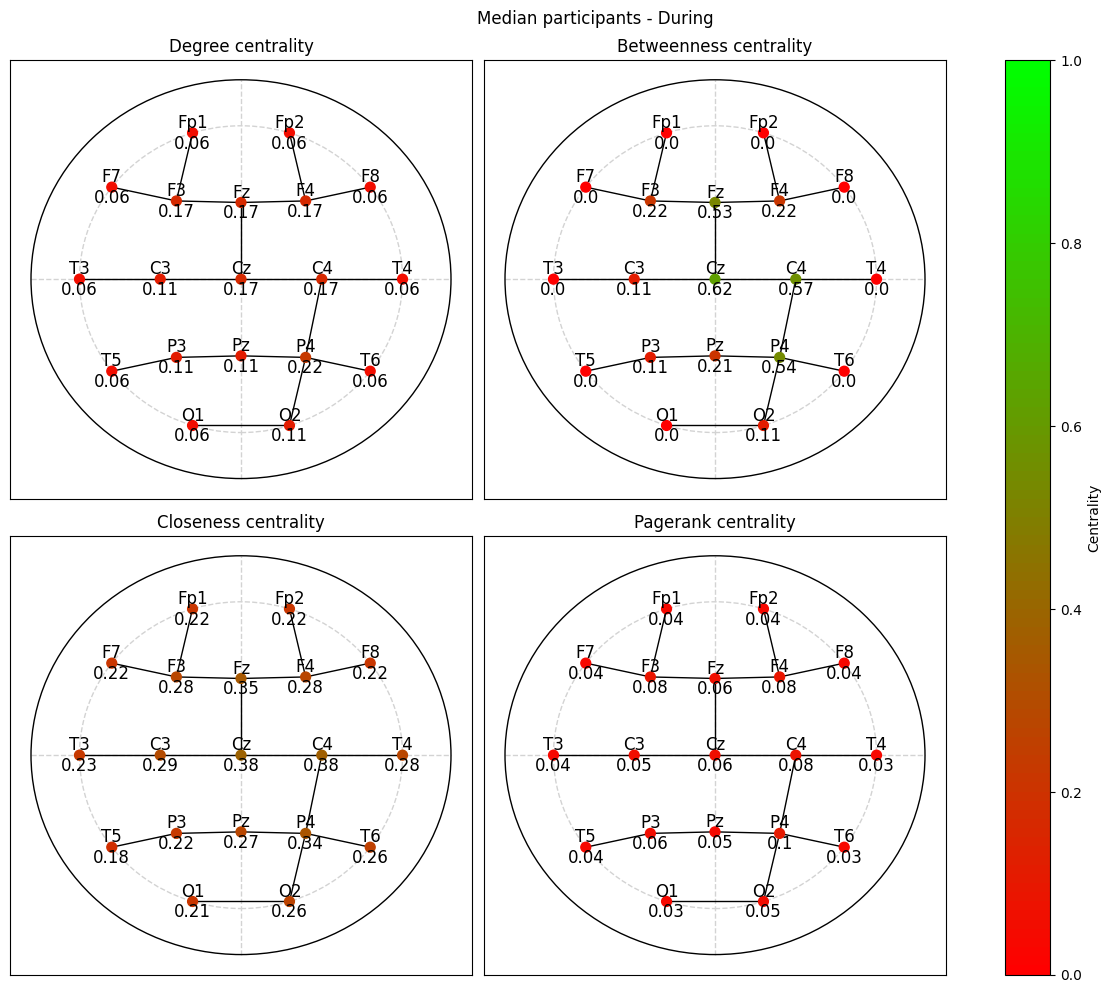

In [7]:
plot_all_measures(mst_med_during, df_centrality_med_dur, 'Median participants - During')

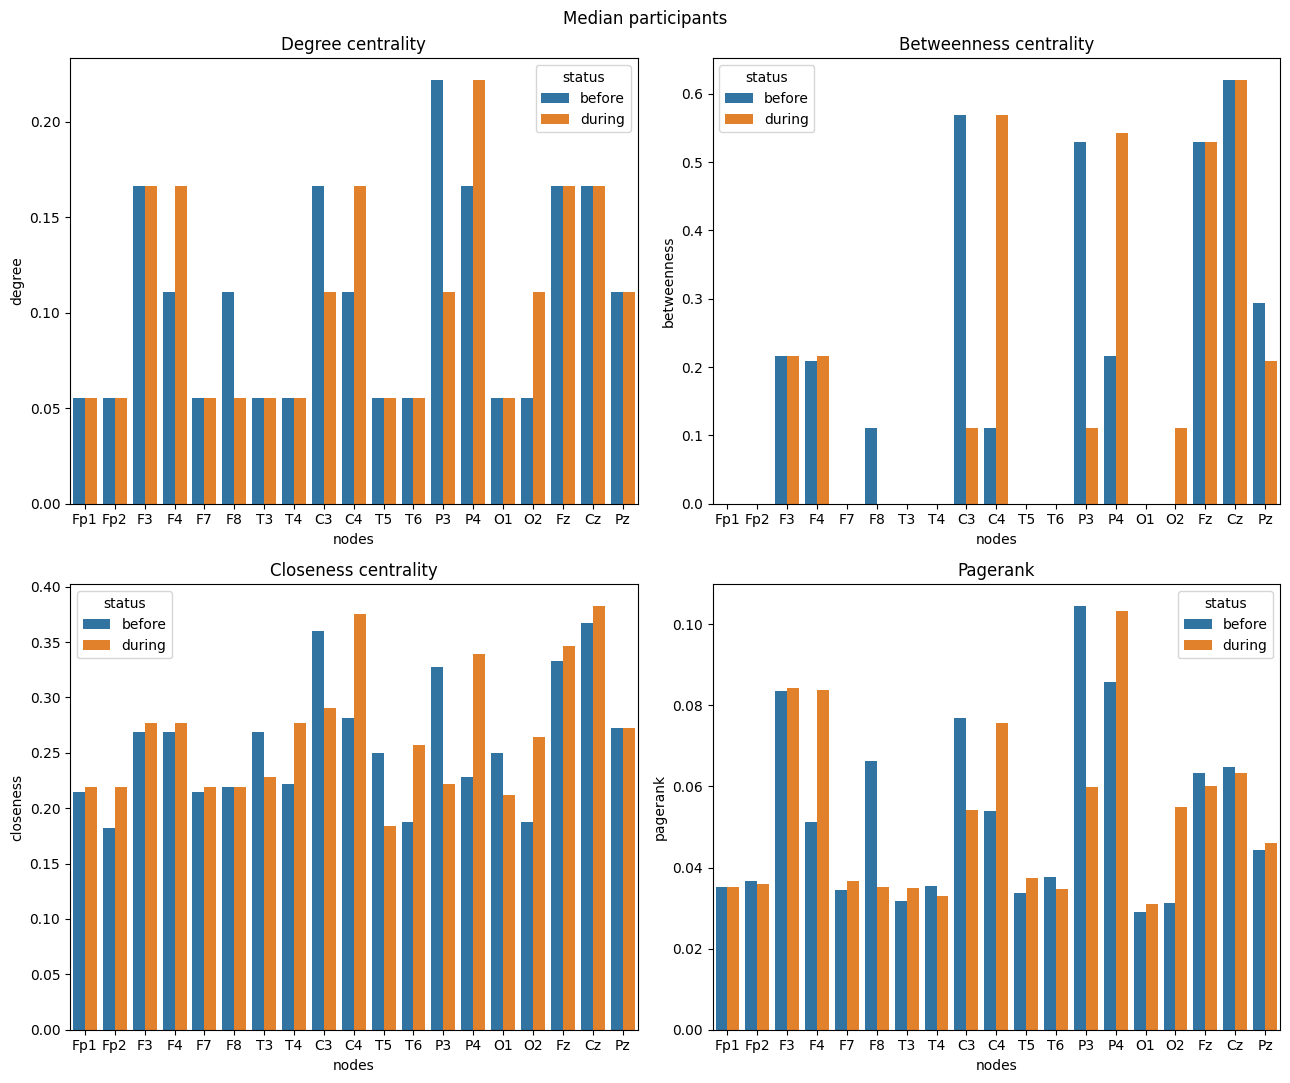

In [8]:
# Todos los nodos de los participantes durante

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 11))
fig.suptitle('Median participants')

ax1.set_title('Degree centrality')
sns.barplot(
    df_centrality_med, x='nodes', y='degree', hue='status', ax=ax1
)

ax2.set_title('Betweenness centrality')
sns.barplot(
    df_centrality_med, x='nodes', y='betweenness', hue='status', ax=ax2
)

ax3.set_title('Closeness centrality')
sns.barplot(
    df_centrality_med, x='nodes', y='closeness', hue='status', ax=ax3
)

ax4.set_title('Pagerank')
sns.barplot(
    df_centrality_med, x='nodes', y='pagerank', hue='status', ax=ax4
)

plt.tight_layout()

## Mediana de las distancas, basado en su calidad de conteo - Antes y durante

In [9]:
distances_b_bef, distances_g_bef = np.zeros((N_BADS, 19, 19), 'float32'), np.zeros((N_GOODS, 19, 19), 'float32')
distances_b_dur, distances_g_dur = np.zeros((N_BADS, 19, 19), 'float32'), np.zeros((N_GOODS, 19, 19), 'float32')

index_bad, index_good = 0, 0

for i, (before, during) in enumerate(zip(distances_bef, distances_dur)):
	if df_subject_info['Count quality'][i] == 1:
		distances_g_bef[index_good] = before
		distances_g_dur[index_good] = during
		index_good += 1
	else:
		distances_b_bef[index_bad] = before
		distances_b_dur[index_bad] = during
		index_bad += 1

In [12]:
med_b_before: pd.DataFrame = pd.DataFrame(np.median(distances_b_bef, 0), columns=CHANNELS)
med_b_during: pd.DataFrame = pd.DataFrame(np.median(distances_b_dur, 0), columns=CHANNELS)
med_g_before: pd.DataFrame = pd.DataFrame(np.median(distances_g_bef, 0), columns=CHANNELS)
med_g_during: pd.DataFrame = pd.DataFrame(np.median(distances_g_dur, 0), columns=CHANNELS)

df_centrality_med_b_before: pd.DataFrame = get_centrality_from_df(med_b_before)
df_centrality_med_b_during: pd.DataFrame = get_centrality_from_df(med_b_during)
df_centrality_med_g_before: pd.DataFrame = get_centrality_from_df(med_g_before)
df_centrality_med_g_during: pd.DataFrame = get_centrality_from_df(med_g_during)

df_centrality_med_b_before['status'] = 'before'
df_centrality_med_b_during['status'] = 'during'
df_centrality_med_g_before['status'] = 'before'
df_centrality_med_g_during['status'] = 'during'

df_centrality_med_b: pd.DataFrame = pd.concat([df_centrality_med_b_before, df_centrality_med_b_during], ignore_index=True)
df_centrality_med_g: pd.DataFrame = pd.concat([df_centrality_med_g_before, df_centrality_med_g_during], ignore_index=True)

df_centrality_med_b['Count quality'] = 'B'
df_centrality_med_g['Count quality'] = 'G'

df_centrality_med_counts: pd.DataFrame = pd.concat([df_centrality_med_b, df_centrality_med_g], ignore_index=True)

In [13]:
mst_med_g_before = get_mst_from_df(med_g_before)
mst_med_g_during = get_mst_from_df(med_g_during)
mst_med_b_before = get_mst_from_df(med_b_before)
mst_med_b_during = get_mst_from_df(med_b_during)

for i, node in enumerate(CHANNELS):
    mst_med_g_before.nodes[node]['degree'] = round(df_centrality_med_g_before['degree'][i], 2)
    mst_med_g_before.nodes[node]['betweenness'] = round(df_centrality_med_g_before['betweenness'][i], 2)
    mst_med_g_before.nodes[node]['closeness'] = round(df_centrality_med_g_before['closeness'][i], 2)
    mst_med_g_before.nodes[node]['pagerank'] = round(df_centrality_med_g_before['pagerank'][i], 2)

    mst_med_g_during.nodes[node]['degree'] = round(df_centrality_med_g_during['degree'][i], 2)
    mst_med_g_during.nodes[node]['betweenness'] = round(df_centrality_med_g_during['betweenness'][i], 2)
    mst_med_g_during.nodes[node]['closeness'] = round(df_centrality_med_g_during['closeness'][i], 2)
    mst_med_g_during.nodes[node]['pagerank'] = round(df_centrality_med_g_during['pagerank'][i], 2)

    mst_med_b_before.nodes[node]['degree'] = round(df_centrality_med_b_before['degree'][i], 2)
    mst_med_b_before.nodes[node]['betweenness'] = round(df_centrality_med_b_before['betweenness'][i], 2)
    mst_med_b_before.nodes[node]['closeness'] = round(df_centrality_med_b_before['closeness'][i], 2)
    mst_med_b_before.nodes[node]['pagerank'] = round(df_centrality_med_b_before['pagerank'][i], 2)

    mst_med_b_during.nodes[node]['degree'] = round(df_centrality_med_b_during['degree'][i], 2)
    mst_med_b_during.nodes[node]['betweenness'] = round(df_centrality_med_b_during['betweenness'][i], 2)
    mst_med_b_during.nodes[node]['closeness'] = round(df_centrality_med_b_during['closeness'][i], 2)
    mst_med_b_during.nodes[node]['pagerank'] = round(df_centrality_med_b_during['pagerank'][i], 2)

### Gráficas

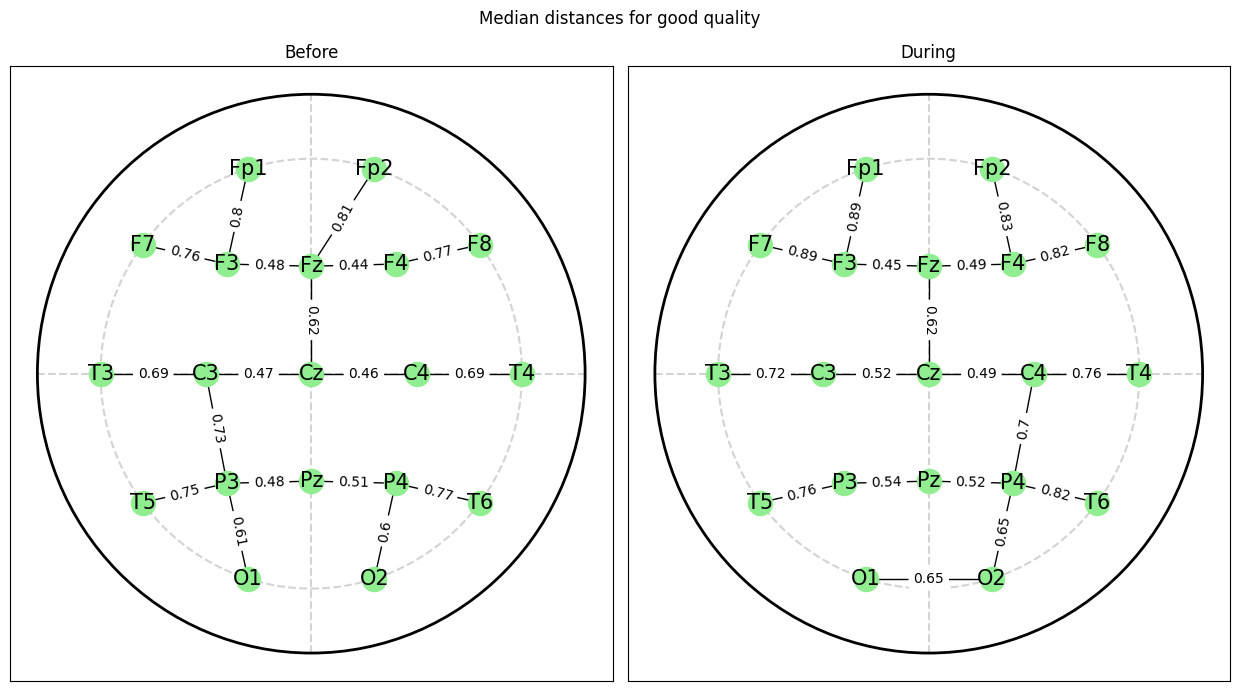

In [15]:
plot_mst_distances(mst_med_g_before, mst_med_g_during, 'Median distances for good quality')

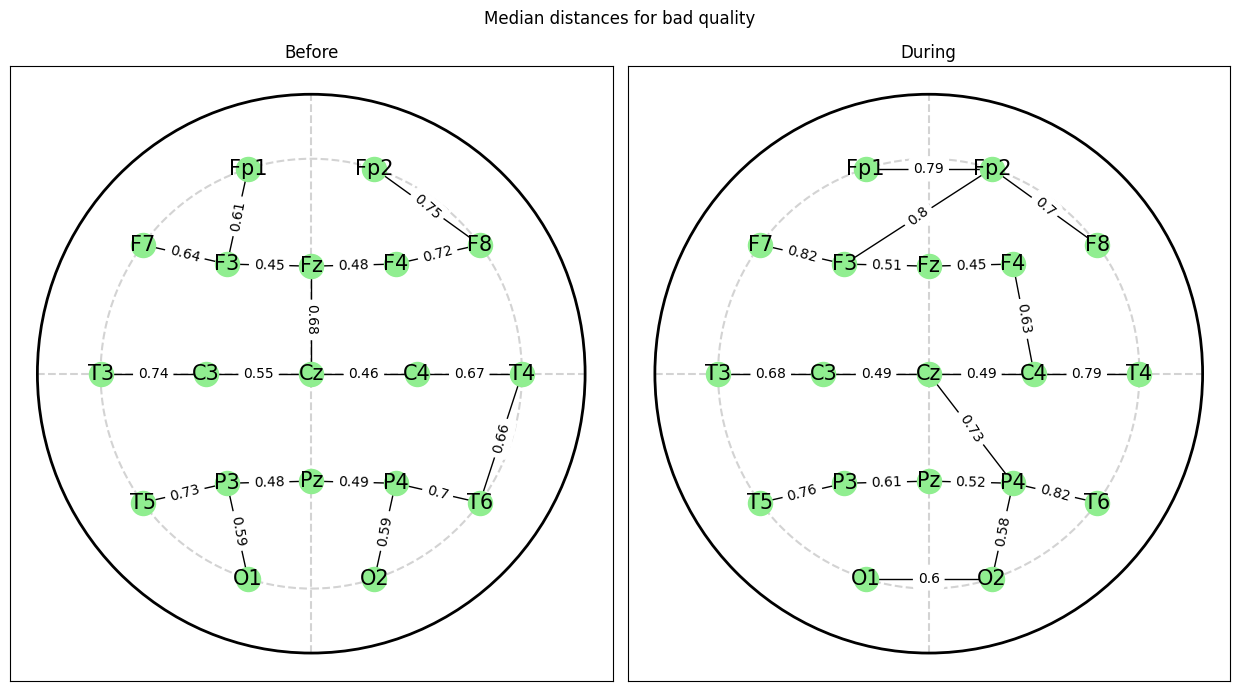

In [16]:
# MST para todos los buenos antes y durante
plot_mst_distances(mst_med_b_before, mst_med_b_during, 'Median distances for bad quality')

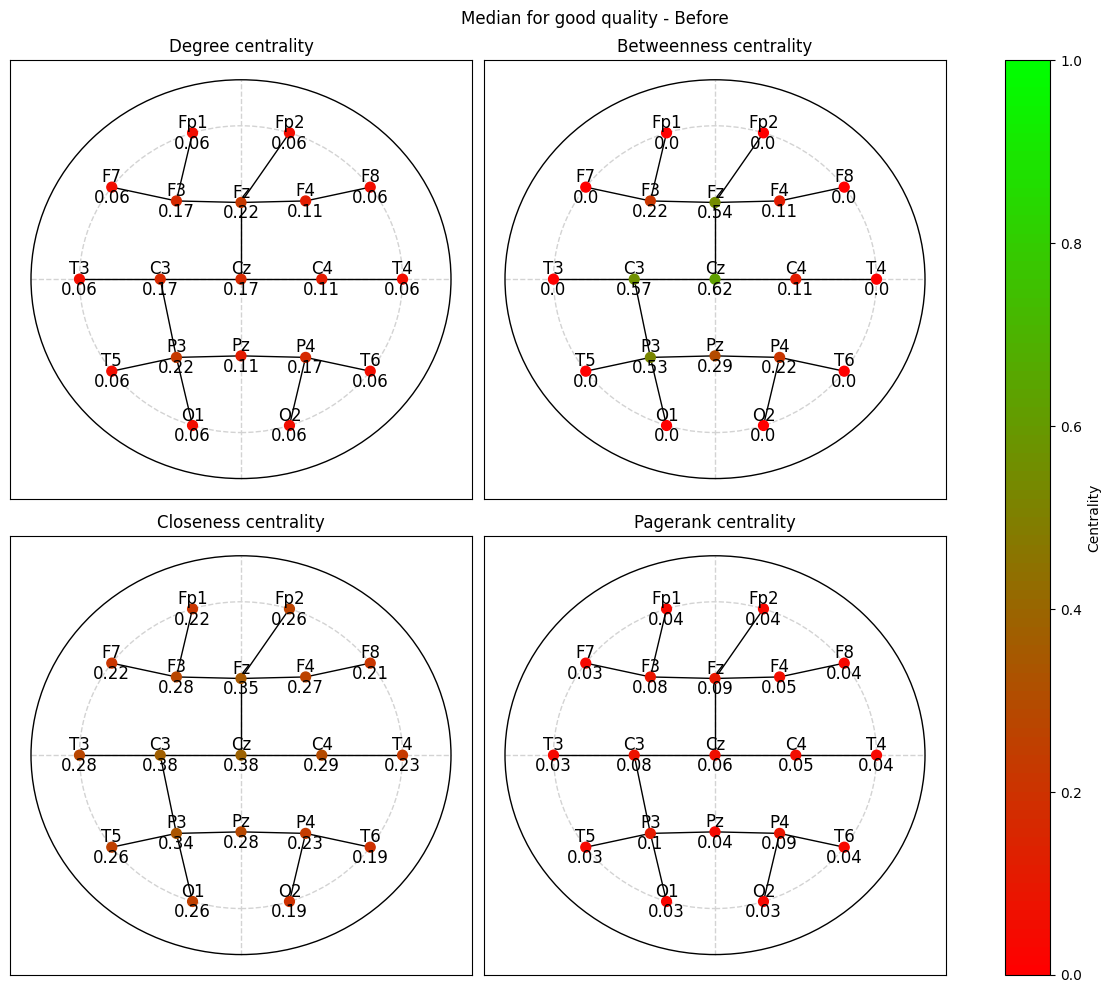

In [17]:
plot_all_measures(mst_med_g_before, df_centrality_med_g_before, 'Median for good quality - Before')

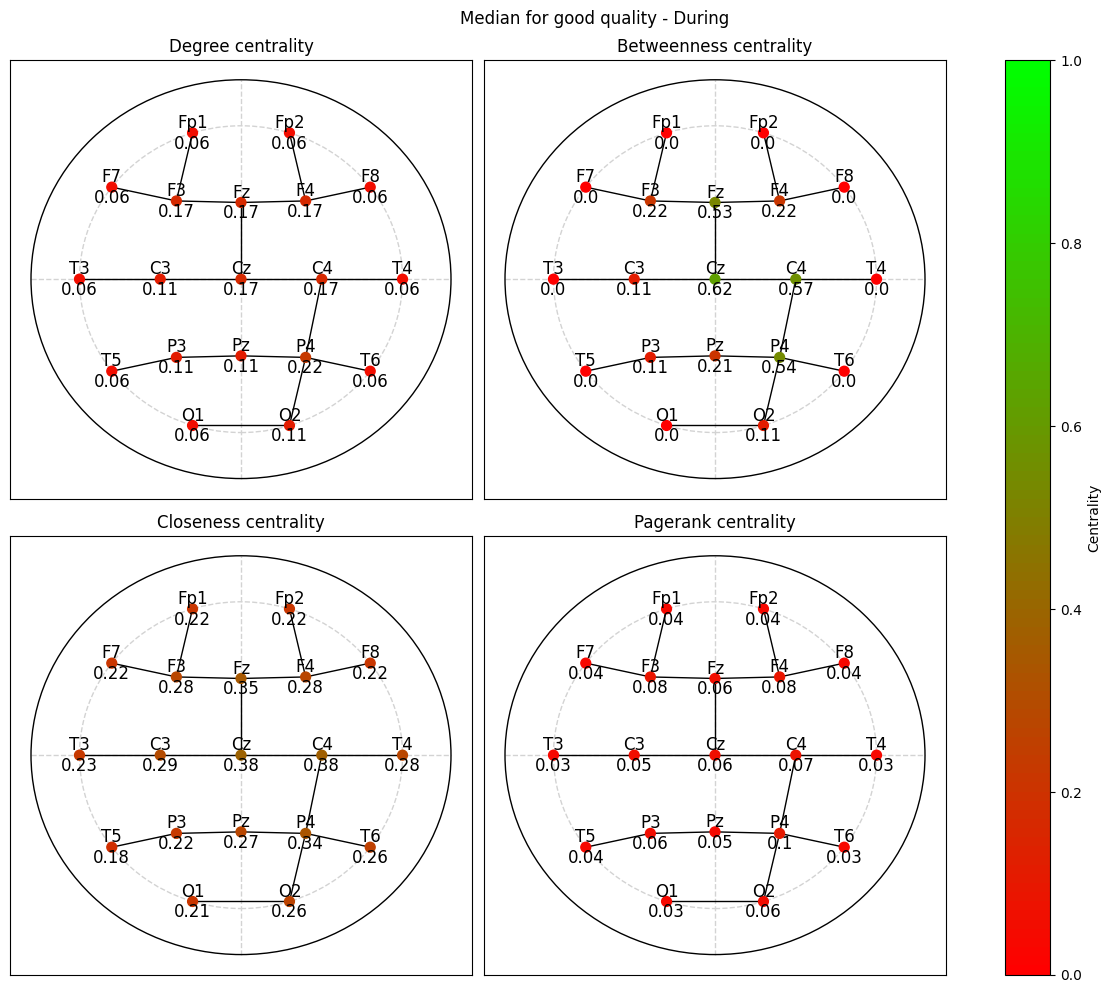

In [18]:
plot_all_measures(mst_med_g_during, df_centrality_med_g_during, 'Median for good quality - During')

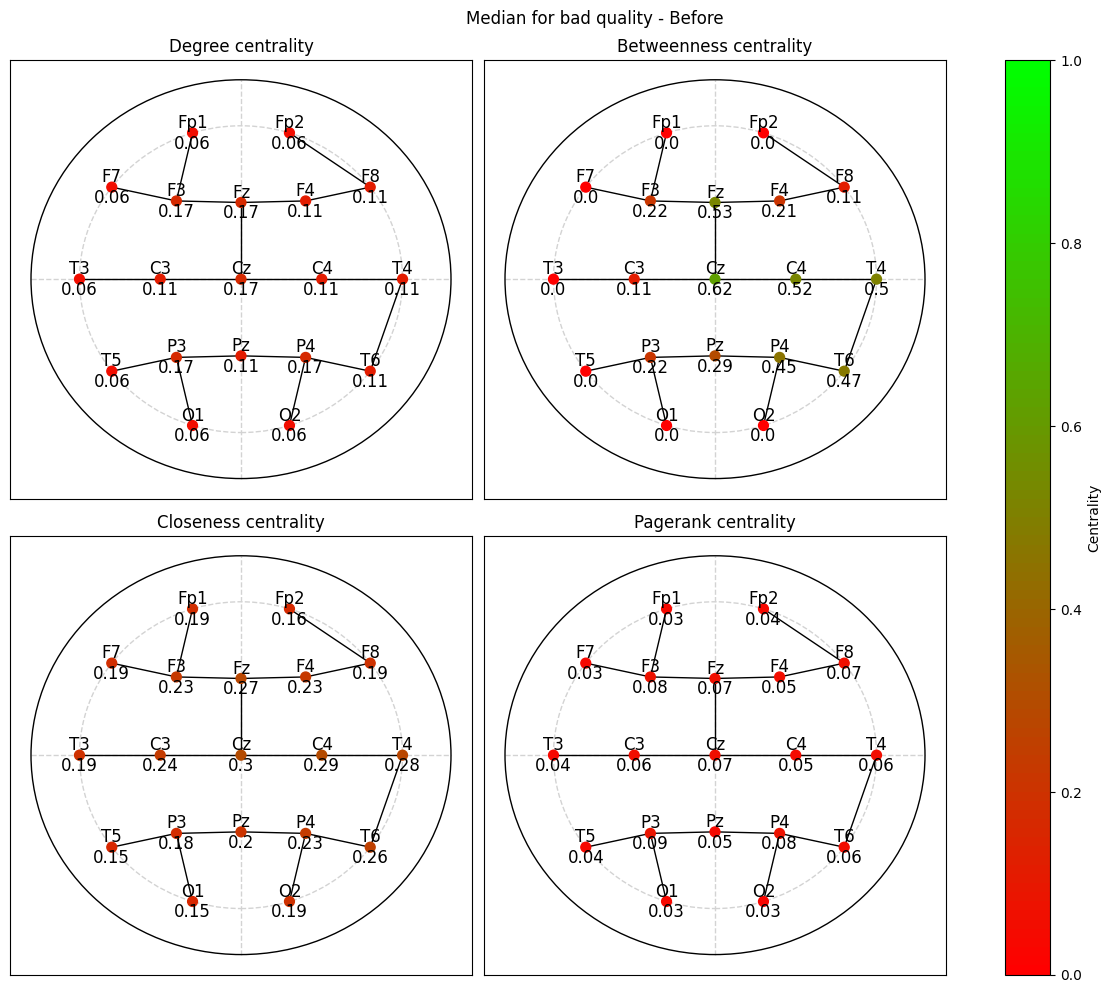

In [19]:
plot_all_measures(mst_med_b_before, df_centrality_med_b_before, 'Median for bad quality - Before')

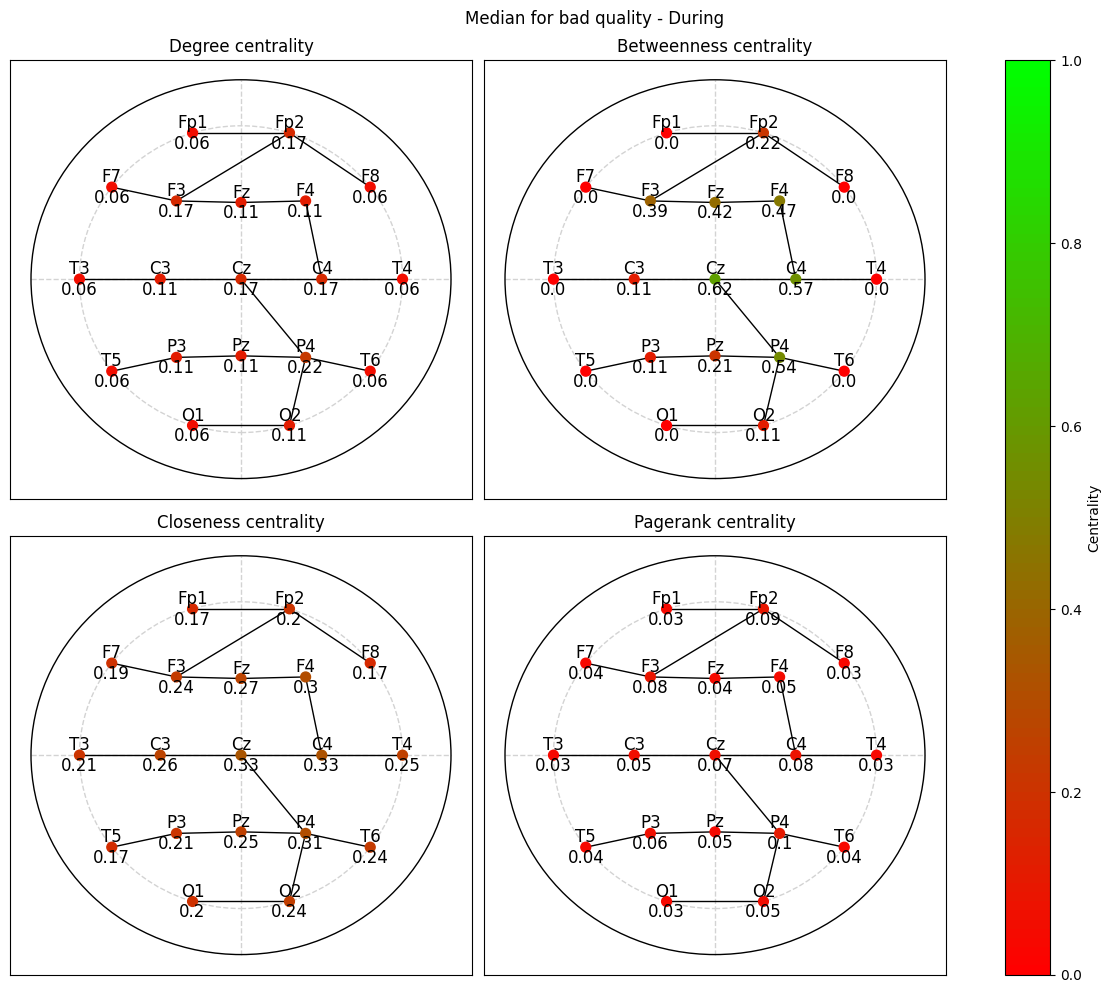

In [20]:
plot_all_measures(mst_med_b_during, df_centrality_med_b_during, 'Median for bad quality - During')

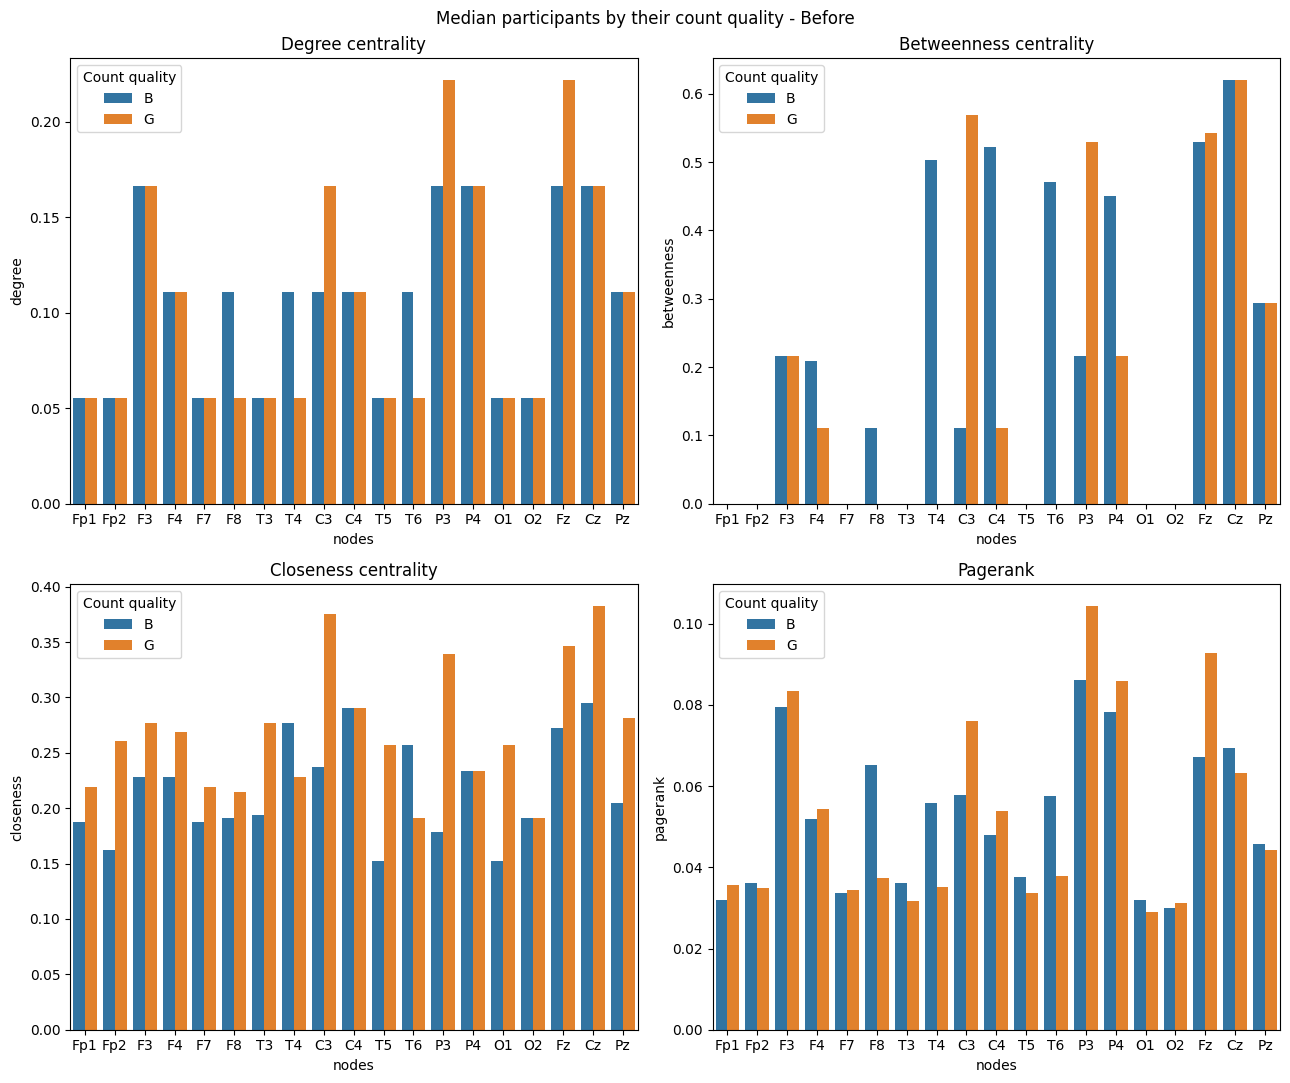

In [21]:
df_temp1 = df_centrality_med_counts[df_centrality_med_counts['status'] == 'before']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 11))
fig.suptitle('Median participants by their count quality - Before')

ax1.set_title('Degree centrality')
sns.barplot(
    df_temp1, x='nodes', y='degree', hue='Count quality', ax=ax1
)

ax2.set_title('Betweenness centrality')
sns.barplot(    
    df_temp1, x='nodes', y='betweenness', hue='Count quality', ax=ax2
)

ax3.set_title('Closeness centrality')
sns.barplot(
    df_temp1, x='nodes', y='closeness', hue='Count quality', ax=ax3
)

ax4.set_title('Pagerank')
sns.barplot(
    df_temp1, x='nodes', y='pagerank', hue='Count quality', ax=ax4
)

plt.tight_layout()

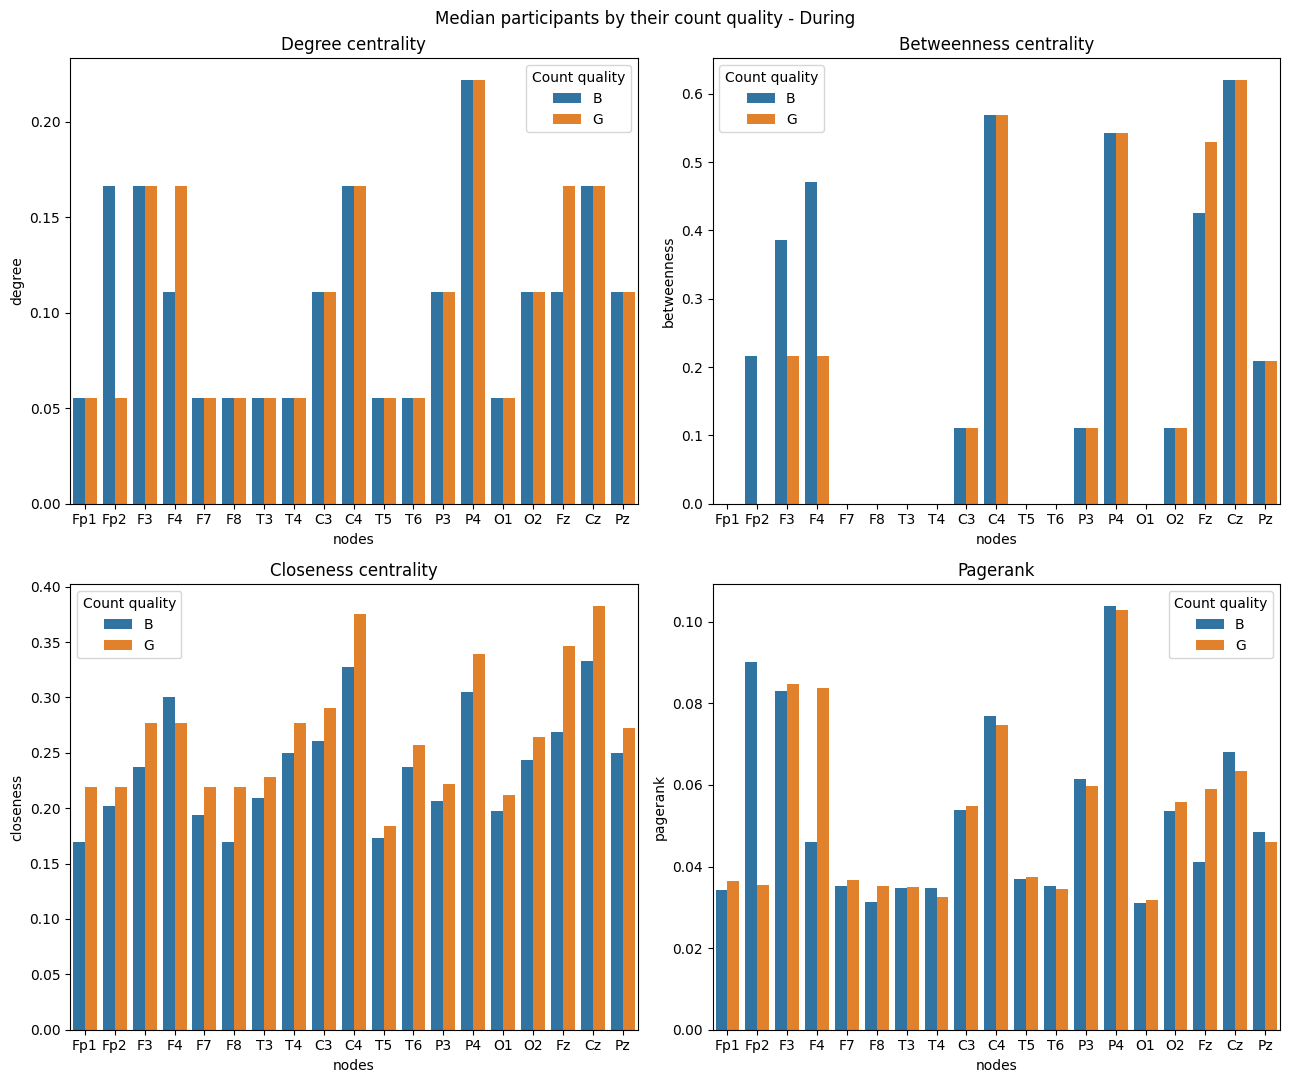

In [22]:
df_temp1 = df_centrality_med_counts[df_centrality_med_counts['status'] == 'during']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 11))
fig.suptitle('Median participants by their count quality - During')

ax1.set_title('Degree centrality')
sns.barplot(
    df_temp1, x='nodes', y='degree', hue='Count quality', ax=ax1
)

ax2.set_title('Betweenness centrality')
sns.barplot(
    df_temp1, x='nodes', y='betweenness', hue='Count quality', ax=ax2
)

ax3.set_title('Closeness centrality')
sns.barplot(
    df_temp1, x='nodes', y='closeness', hue='Count quality', ax=ax3
)

ax4.set_title('Pagerank')
sns.barplot(
    df_temp1, x='nodes', y='pagerank', hue='Count quality', ax=ax4
)

plt.tight_layout()